# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>

</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue.
<br>● Certain columns, like ‘cast’and ‘genres’, contain multiple values separated by pipe (|) characters.
<br>● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
<br>● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars.
>
> ### **Questions**: 
● Which genres are most popular from year to year ? 
<br>● Movies with most money lost ?
<br>● Top movies earnings ?


In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Load and show the dataset of tmdb movies
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Insights From describtion:
* Movies release year are from 1960 to 2015 
* I find that max runtime is 900 which looked non normal runtime for a movie so I am going to investiagate it 
* Movies with no budget or no runtime will also be removed so not affect our calculations

In [4]:
# investigation about the movie with 900 min runtime (Found that it is a movie with no budget , no revenue) 
# So obviously there is a wrong data entry here and I am going to remove that row
longest_movie = df.query('runtime == 900')
longest_movie

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,09/03/2011,14,9.2,2011,0.0,0.0


## Data Cleaning

In [5]:
# Removing the row of the 900 runtime movie
df = df.loc[df['runtime'] != 900]

# Removing Movies with no runtime
df = df.loc[df['runtime'] != 0]

# Removing Movies with no budget 
df = df.loc[df['budget'] != 0]

# Removing Movies with no revenues
df = df.loc[df['revenue'] != 0]

df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,Mike Nicholsâ€™ film from Edward Albee's play ...,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,An American scientist publicly defects to East...,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,"Cole Thornton, a gunfighter for hire, joins fo...",120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,Engineer Jake Holman arrives aboard the gunboa...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08


In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#Removing columns imdb_id and id (don't need them in my analysis)
df.drop(['imdb_id','cast','homepage','tagline','keywords','overview','production_companies'], axis = 1, inplace = True)
df.head(1)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09


In [8]:
#Checking data_types and null_values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3855 non-null   int64  
 1   popularity      3855 non-null   float64
 2   budget          3855 non-null   int64  
 3   revenue         3855 non-null   int64  
 4   original_title  3855 non-null   object 
 5   director        3854 non-null   object 
 6   runtime         3855 non-null   int64  
 7   genres          3855 non-null   object 
 8   release_date    3855 non-null   object 
 9   vote_count      3855 non-null   int64  
 10  vote_average    3855 non-null   float64
 11  release_year    3855 non-null   int64  
 12  budget_adj      3855 non-null   float64
 13  revenue_adj     3855 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory usage: 451.8+ KB


In [9]:
#Find just one record missing for director so I will drop it
df[df['director'].isnull() == True]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3276,15467,0.147657,4180000,11000000,Kismat Konnection,NaN,153,Drama|Comedy|Romance|Foreign,7/18/08,11,5.8,2008,4233448.129,11140652.97


In [10]:
#Removing the null value & check if any of columns have null values - should print False
df.dropna(inplace=True)
df.isnull().sum().any()

False

In [11]:
#Check for duplicated rows
df.duplicated().sum()

1

In [12]:
#Drop duplicates & check if any of columns have duplicated values - should print False
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [13]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3853.000000,3853.000000,3.853000e+03,3.853000e+03,3853.000000,3853.000000,3853.000000,3853.000000,3.853000e+03,3.853000e+03
mean,39894.523488,1.191825,3.721227e+07,1.077117e+08,109.208928,527.854399,6.168258,2001.259278,4.425038e+07,1.370974e+08
std,67230.100737,1.475258,4.221035e+07,1.765554e+08,19.912913,880.031643,0.795001,11.283517,4.481043e+07,2.161299e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.000000,0.462609,1.000000e+07,1.360940e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.840420e+07
50%,11321.000000,0.797723,2.400000e+07,4.480678e+07,106.000000,204.000000,6.200000,2004.000000,3.001664e+07,6.174274e+07
75%,38575.000000,1.368403,5.000000e+07,1.242721e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632752e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
def genres_count(df , column):
    genres_df = df.assign(genres_ = column.str.split('|')).explode('genres_')
    genres_counter = genres_df['genres_'].value_counts()
    return genres_counter

In [15]:
def plot(x, y, x_label, y_label, title, color):
    plt.figure(figsize=(30, 15))
    plt.bar( x , y,color=color)
    plt.xlabel(  x_label,fontsize=20 )
    plt.ylabel(y_label,fontsize=20)
    plt.title( title,fontsize=25 )
    plt.grid(True) 
    plt.draw()

In [16]:
def pie_plotting (values,labels, legend ):
    colors = sns.color_palette('pastel')[0:5]
    plt.figure(figsize =(10, 7))
    plt.pie(values, labels=labels,colors = colors)
    plt.legend(title = legend, bbox_to_anchor=(1.6,1))

    plt.show() 

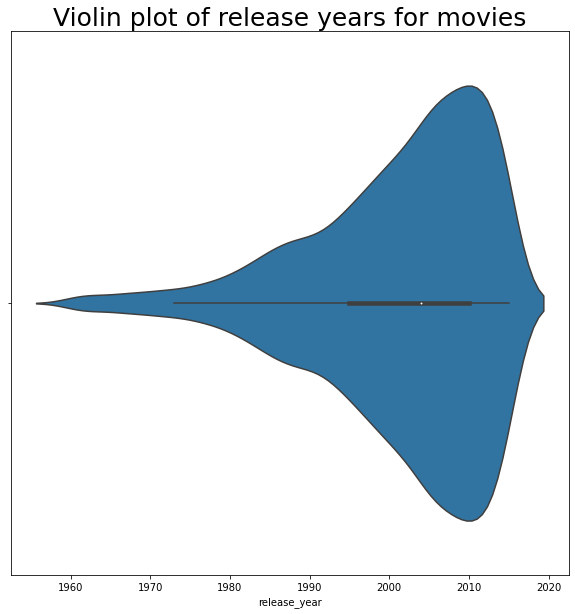

In [17]:
plt.figure(figsize=(10, 10)) 
plt.title( 'Violin plot of release years for movies',fontsize=25 )

sns.violinplot(x=df['release_year']);


This plot allowed me show the distribution of release years for movies in the data set and the probability density:
<br>The number of movies starting from 1995 to 2015 increased much more than that from 1960 to 1990 
<br>So we must pay attention to the number of movies per year is different 
<br>ex: If profit in 1970 is x and in 2015 is 10x that doesn't mean the movies profit increased 10 times as the number of movies are different

<a id='eda'></a>
## Exploratory Data Analysis


### Q1: Which genres are most popular from year to year?

In [18]:
#Sorted by release_year and popularity in descending order
sorted_df = df.sort_values(["release_year", "popularity"],axis=0, ascending = False)
sorted_df

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,04/01/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10141,539,2.610362,806948,32000000,Psycho,Alfred Hitchcock,109,Drama|Horror|Thriller,8/14/60,1180,8.0,1960,5.949601e+06,2.359350e+08
10142,966,1.872132,2000000,4905000,The Magnificent Seven,John Sturges,128,Action|Adventure|Western,10/23/60,224,7.0,1960,1.474593e+07,3.616441e+07
10143,967,1.136943,12000000,60000000,Spartacus,Stanley Kubrick,197,Action|Drama|History,10/06/1960,211,6.9,1960,8.847561e+07,4.423780e+08
10144,284,0.947307,3000000,25000000,The Apartment,Billy Wilder,125,Comedy|Drama|Romance,6/15/60,235,7.9,1960,2.211890e+07,1.843242e+08


In [19]:
#Then grouping by release_year and finding the maximum popularity for each year and displaying the genres with this popularity
genres_df = sorted_df.groupby(['release_year'])[['popularity','genres']].max()
genres_df

,popularity,genres
release_year,,
1960,2.610362,Drama|Horror|Thriller
1961,2.631987,Western|Action
1962,3.170651,Western|Action|Adventure|Drama
1963,2.508235,Horror
1964,3.153791,Drama|Romance
1965,1.910465,Drama|Romance|War
1966,0.670274,Mystery|Thriller
1967,2.550704,Music|Drama|Romance
1968,3.309196,Western


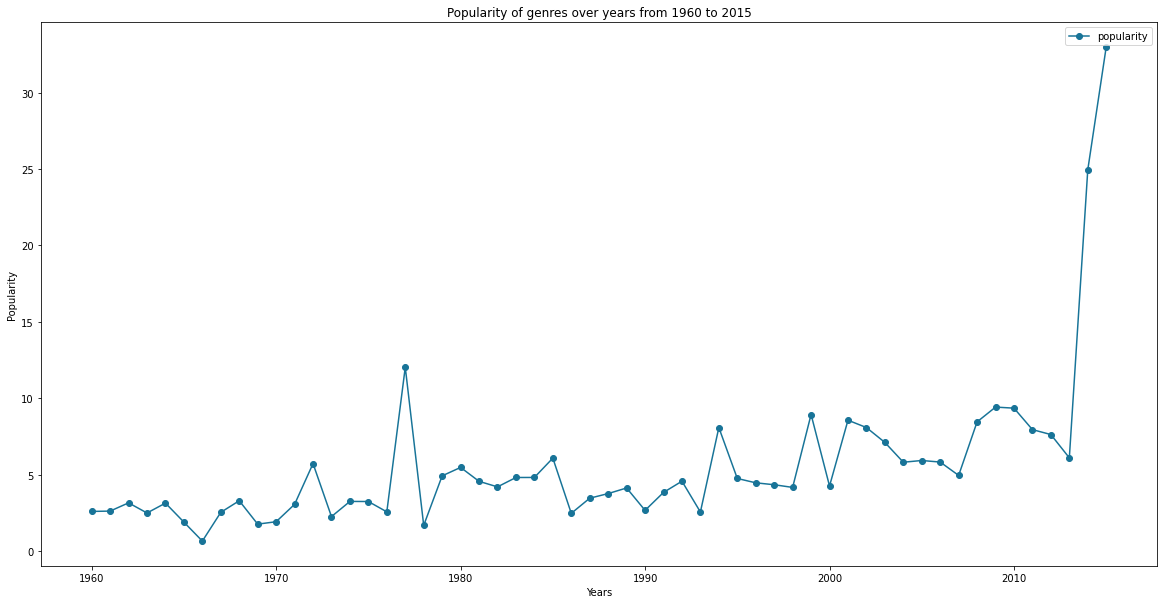

In [20]:
#plotting the insights of Which genres are most popular from year to year?
genres_df.plot(figsize=(20,10),title='Popularity of genres over years from 1960 to 2015', xlabel="Years", ylabel="Popularity",marker='o',color='#187498');


This plot allowed me to see the maximum popularity of movies per year and from the table in the previous cell you will see that popularity is for a movie in which genres so you can identify the genres trends over years

### Q2: Movies with most money lost ?

In [21]:
#profit = revenue_adj - budget_adj
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

In [22]:
#Sorting with top losing money movies
Top_Losing_adj = df.sort_values('profit_adj',ascending = True)
Worst_movies = Top_Losing_adj.head(10) #Can be changed to any worst n numbers
Worst_movies

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
2244,46528,0.250540,425000000,11087569,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,12/02/2010,74,6.4,2010,425000000.0,1.108757e+07,-4.139124e+08
5508,57201,1.214510,255000000,89289910,The Lone Ranger,Gore Verbinski,149,Action|Adventure|Western,07/03/2013,1607,6.0,2013,238688504.9,8.357833e+07,-1.551102e+08
7031,10733,0.948560,145000000,25819961,The Alamo,John Lee Hancock,137,Western|History|War,04/07/2004,60,5.9,2004,167394583.0,2.980774e+07,-1.375868e+08
2435,1911,1.189386,160000000,61698899,The 13th Warrior,John McTiernan,102,Adventure|Fantasy|Action,8/27/99,275,6.2,1999,209448455.5,8.076712e+07,-1.286813e+08
4970,10009,1.653031,100000000,250,Brother Bear,Aaron Blaise|Robert Walker,85,Animation|Adventure|Family|Fantasy,10/20/03,753,6.8,2003,118535264.5,2.963382e+02,-1.185350e+08
8102,1408,0.981049,98000000,18517322,Cutthroat Island,Renny Harlin,119,Action|Adventure,12/22/95,54,6.1,1995,140234753.0,2.649767e+07,-1.137371e+08
4078,11692,0.912373,100000000,7103973,The Adventures of Pluto Nash,Ron Underwood,95,Action|Comedy|Science Fiction,8/15/02,75,4.6,2002,121226139.4,8.611872e+06,-1.126143e+08
3484,50321,0.921653,150000000,38992758,Mars Needs Moms,Simon Wells,88,Adventure|Animation|Family,03/09/2011,129,5.5,2011,145409706.4,3.779950e+07,-1.076102e+08
7332,10935,0.418950,44000000,3484331,Heaven's Gate,Michael Cimino,219,Action|Drama|History|Western,11/19/80,18,6.0,1980,116425617.1,9.219668e+06,-1.072059e+08
8765,10384,0.385350,90000000,14828081,Supernova,Walter Hill|Jack Sholder,91,Science Fiction,1/14/00,42,4.7,2000,113966290.3,1.877668e+07,-9.518961e+07


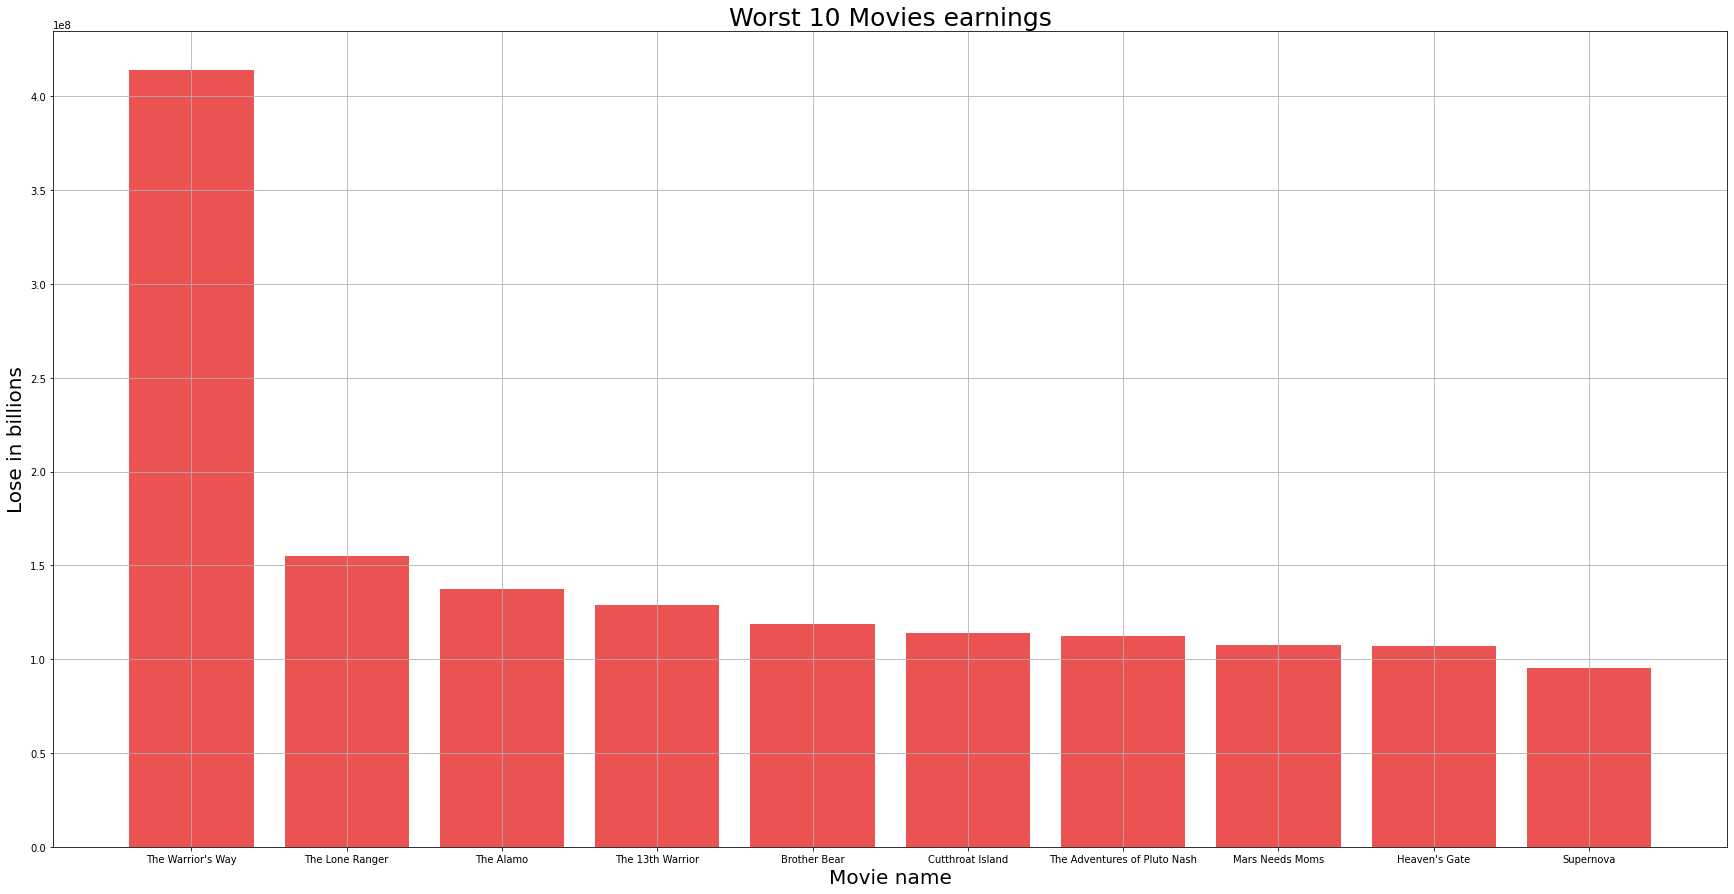

In [23]:
plot(Worst_movies.original_title, -Worst_movies.profit_adj, "Movie name", "Lose in billions", "Worst 10 Movies earnings", "#EB5353")

This plot is showing the Worst 10 movies names and lose ordered in descending order of lose

#### Checking the genres of worst movies

In [24]:
worst_genres_count = genres_count(Worst_movies , Worst_movies['genres'])
worst_genres_count

Adventure          6
Action             6
Western            4
Fantasy            3
History            2
Animation          2
Family             2
Science Fiction    2
Thriller           1
War                1
Comedy             1
Drama              1
Name: genres_, dtype: int64

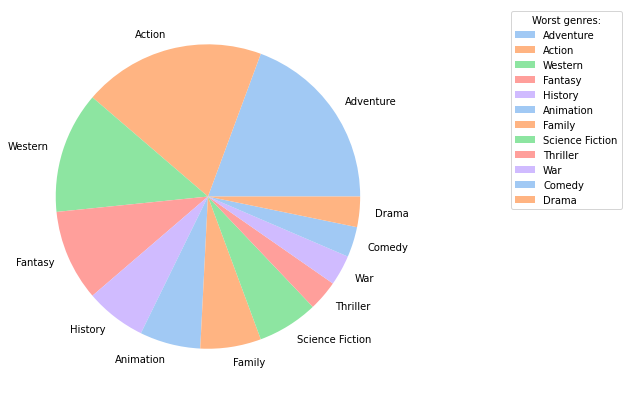

In [25]:
pie_plotting (worst_genres_count, worst_genres_count.index, "Worst genres:")

### Q3: Top movies earnings

In [26]:
#Sorting with top earnings movies
Top_Earnings_adj = df.sort_values('profit_adj',ascending = False)
Top_movies = Top_Earnings_adj.head(10) #Can be changed to any worst n numbers
Top_movies

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
1329,11,12.037933,11000000,775398007,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09
1386,19995,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/2009,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09
5231,597,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09
10594,9552,2.010733,8000000,441306145,The Exorcist,William Friedkin,122,Drama|Horror|Thriller,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09,2.128036e+09
9806,578,2.563191,7000000,470654000,Jaws,Steven Spielberg,124,Horror|Thriller|Adventure,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09,1.878643e+09
8889,601,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Steven Spielberg,115,Science Fiction|Adventure|Family|Fantasy,04/03/1982,1830,7.2,1982,2.372625e+07,1.791694e+09,1.767968e+09
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
8094,1642,1.136610,22000000,1106279658,The Net,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,7/28/95,201,5.6,1995,3.148127e+07,1.583050e+09,1.551568e+09
10110,12230,2.631987,4000000,215880014,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09,1.545635e+09
7309,1891,5.488441,18000000,538400000,The Empire Strikes Back,Irvin Kershner,124,Adventure|Action|Science Fiction,01/01/1980,3954,8.0,1980,4.762866e+07,1.424626e+09,1.376998e+09


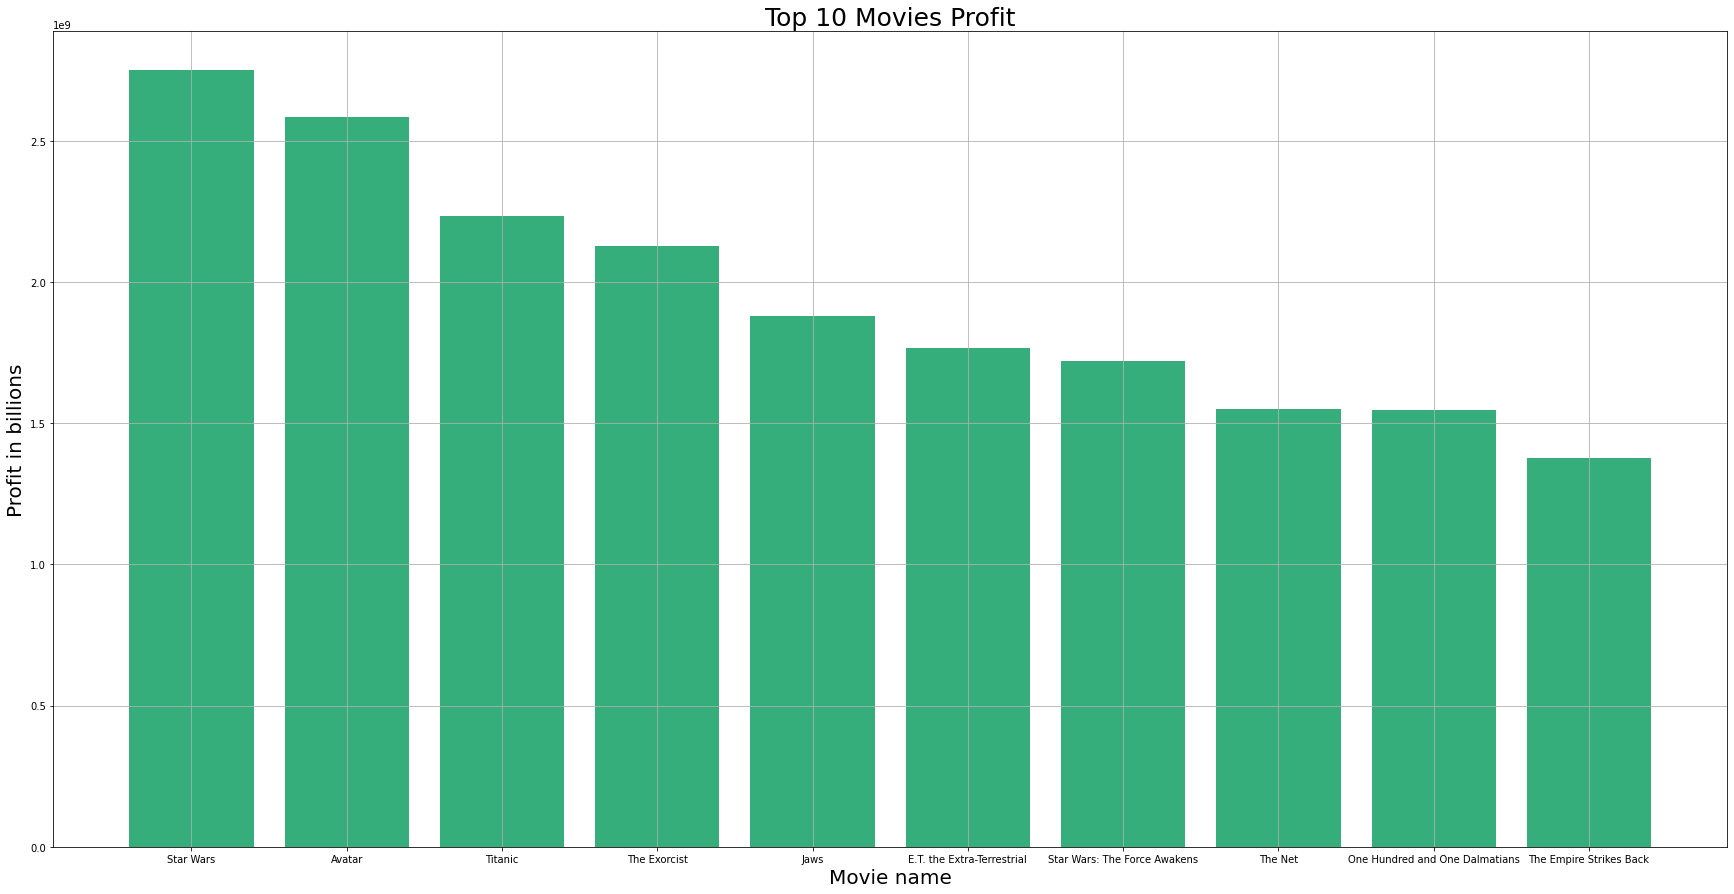

In [27]:
plot(Top_movies.original_title, Top_movies.profit_adj, "Movie name", "Profit in billions", "Top 10 Movies Profit", "#36AE7C")

This plot is showing the Top 10 movies names and profits ordered in descending order of earnings

#### Checking the genres of top movies

In [28]:
genres_count = genres_count(Top_movies , Top_movies['genres'])
genres_count

Adventure          7
Action             5
Science Fiction    5
Thriller           4
Fantasy            3
Drama              3
Horror             2
Family             2
Romance            1
Crime              1
Mystery            1
Animation          1
Comedy             1
Name: genres_, dtype: int64

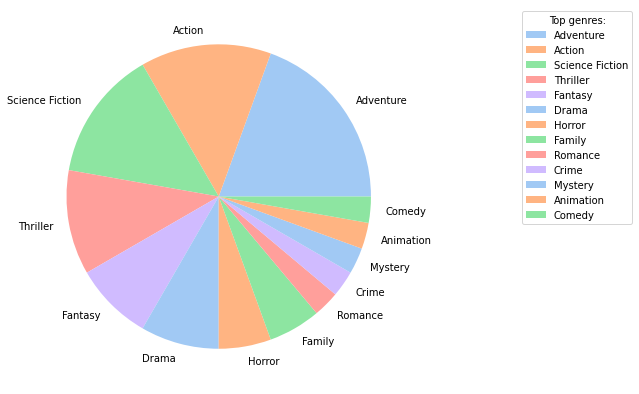

In [29]:
pie_plotting (genres_count, genres_count.index, "Top genres:")

<a id='conclusions'></a>
## Conclusions

#### The most profitable movies are that from genres (Adventure / Action / Science Fiction / Thriller)
#### The lowest movies in earnings are that from genres (Adventure / Action / Wstern / Fantasy / history)
#### We can find that genres popularity are different over years that in 1960 (Drama|Horror|Thriller) was the most popular while in 2012 (War|Action|Thriller|Science Fiction)
#### 2010 had the maximum number of movies released
<mark>'Star wars' movie earn the highest profit in all, making over 2.7B in profit in this dataset.And the worst in earnings movie in this dataset is The Warrior's Way.</mark>


<a id='limitations'></a>
## Limitations

There was many null and empty values that may change in results
<br> different number of movies in the dataset for each release year (2010 has the maximum number of movies)
<br> Some budget and revenues were zeros so removed these movies
<br> currency is not given for whether budget nor revenue
<br> genres are not correct for some movies when I researched for them